In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path)

In [21]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938,tt0029927,6.9,886,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,8752,JP
2,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112543,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993,tt0107286,6.6,19282,US
4,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2315370,"AD, AT, CU, DE, IN, JP, SN"


In [7]:
# Data Overview
print("Data Overview:")
print(data.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51916 entries, 0 to 51915
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               50475 non-null  object 
 1   type                51916 non-null  object 
 2   genres              50823 non-null  object 
 3   releaseYear         51776 non-null  float64
 4   imdbId              49093 non-null  object 
 5   imdbAverageRating   48367 non-null  float64
 6   imdbNumVotes        48367 non-null  float64
 7   availableCountries  51916 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.2+ MB
None


In [9]:
print(data.describe())

       releaseYear  imdbAverageRating  imdbNumVotes
count  51776.00000       48367.000000  4.836700e+04
mean    2003.83699           6.004776  1.628238e+04
std       19.77384           1.328715  8.350527e+04
min     1902.00000           1.000000  5.000000e+00
25%     1998.00000           5.200000  1.480000e+02
50%     2012.00000           6.200000  6.230000e+02
75%     2017.00000           7.000000  3.151500e+03
max     2025.00000           9.900000  2.958776e+06


In [11]:
print(data.isnull().sum())

title                 1441
type                     0
genres                1093
releaseYear            140
imdbId                2823
imdbAverageRating     3549
imdbNumVotes          3549
availableCountries       0
dtype: int64


In [13]:
# Data Cleaning and Preprocessing
# Handle missing values
data['releaseYear'].fillna(data['releaseYear'].median(), inplace=True)
data['imdbAverageRating'].fillna(data['imdbAverageRating'].median(), inplace=True)
data['imdbNumVotes'].fillna(0, inplace=True)

In [15]:
# Ensure data types are consistent
data['releaseYear'] = data['releaseYear'].astype(int)
data['imdbNumVotes'] = data['imdbNumVotes'].astype(int)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


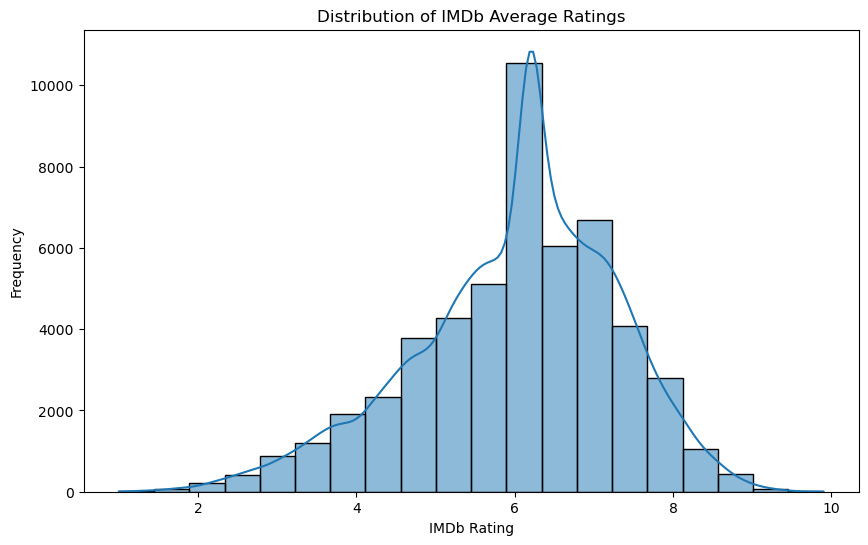

In [17]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(data['imdbAverageRating'], bins=20, kde=True)
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

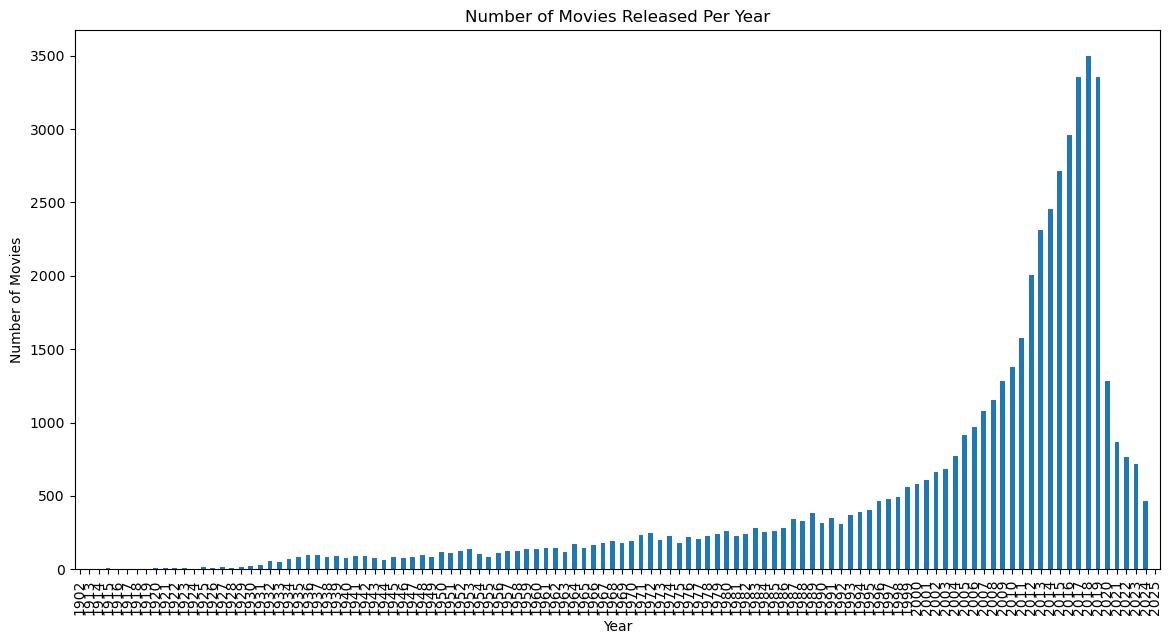

In [19]:
plt.figure(figsize=(14, 7))
data['releaseYear'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

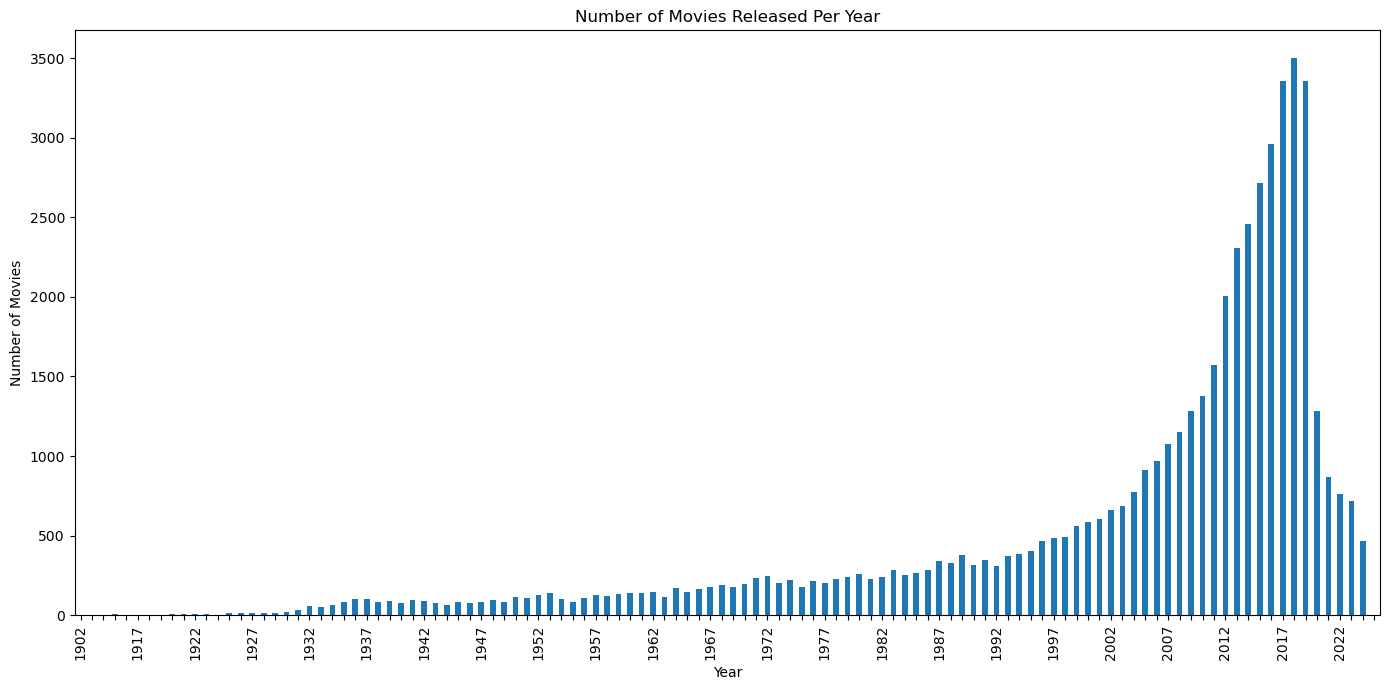

In [23]:
plt.figure(figsize=(14, 7))
ax = data['releaseYear'].value_counts().sort_index().plot(kind='bar')

# Set rotation angle for x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Reduce the number of labels shown (optional)
for index, label in enumerate(ax.get_xticklabels()):
    if index % 5 != 0:  # Show every 5th label for better spacing
        label.set_visible(False)

plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()


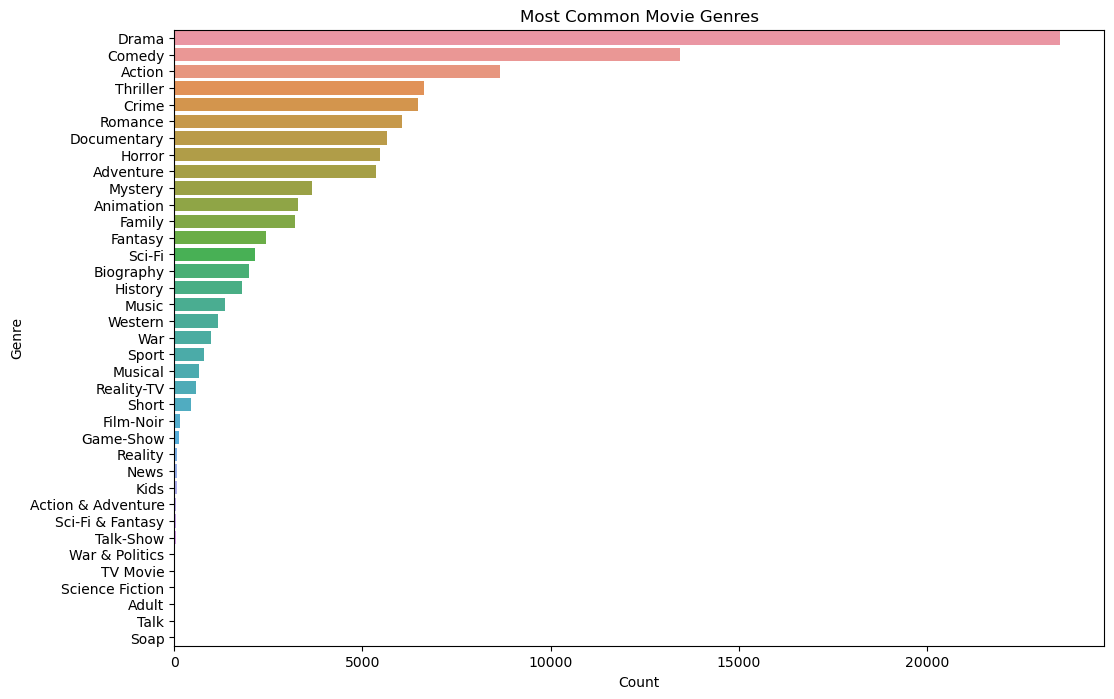

In [25]:
from collections import Counter

genre_counts = Counter([genre for sublist in data['genres'].dropna().str.split(', ') for genre in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df)
plt.title('Most Common Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

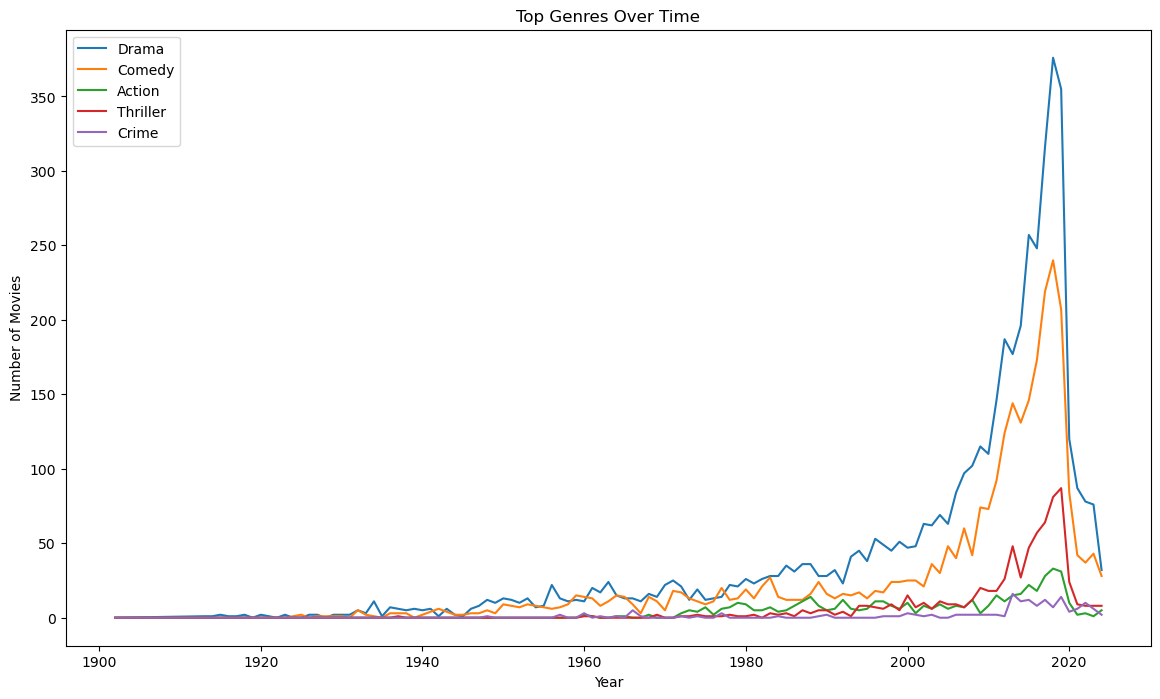

In [37]:
# Group data by release year and genre
genre_years = data.explode('genres').groupby(['releaseYear', 'genres']).size().unstack(fill_value=0)

# Plot the top genres over time
top_genres = genre_df['Genre'].head(5)  # Change number of genres as needed
plt.figure(figsize=(14, 8))
for genre in top_genres:
    if genre in genre_years.columns:
        plt.plot(genre_years.index, genre_years[genre], label=genre)

plt.title('Top Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

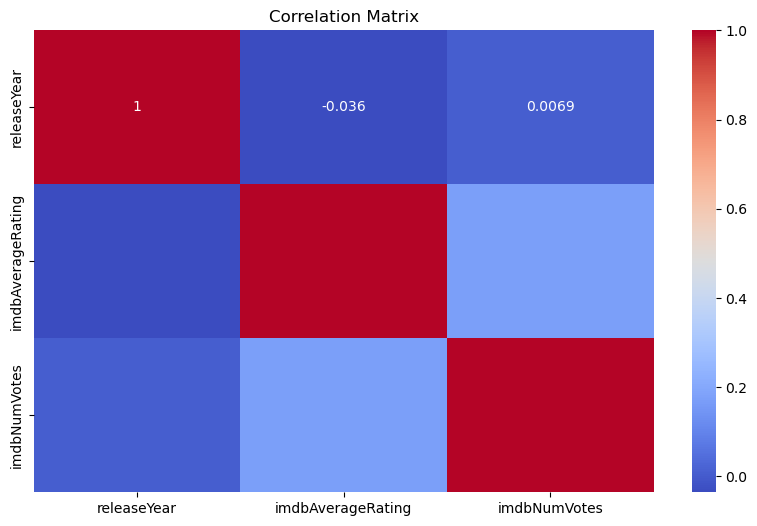

In [45]:
# Correlation Analysis with only numeric columns
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [47]:
# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data for prediction (using IMDb average rating as the target)
features = data[['releaseYear', 'imdbNumVotes']]
target = data['imdbAverageRating']

In [49]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Mean Squared Error:", mse)
print("Model R-squared:", r2)

Model Mean Squared Error: 1.618153986953382
Model R-squared: 0.03043465205784124


In [51]:
# Conclusion and Future Work
print("\nConclusion:")
print("The linear regression model's performance metrics show that it can predict IMDb ratings to a certain extent based on the number of votes and release year.")
print("Future work could involve using more sophisticated models and additional features, such as movie genres or availability by country, for improved predictions.")



Conclusion:
The linear regression model's performance metrics show that it can predict IMDb ratings to a certain extent based on the number of votes and release year.
Future work could involve using more sophisticated models and additional features, such as movie genres or availability by country, for improved predictions.
